In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [162]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [163]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

SalesPrice's skewness: 1.882876
SalePrice's kurtosis: 6.536282


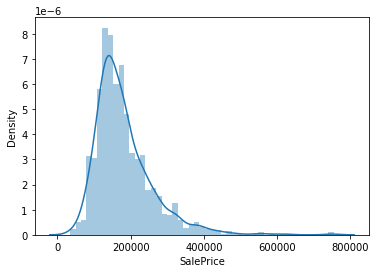

In [164]:
train_data['SalePrice'].describe()
sns.distplot(train_data['SalePrice'])
print("SalesPrice's skewness: %f" %train_data['SalePrice'].skew())
print("SalePrice's kurtosis: %f" %train_data['SalePrice'].kurt())

In [165]:
train_data_size = train_data.shape[0]
test_data_size = test_data.shape[0]
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

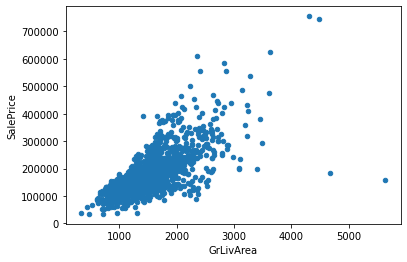

In [166]:
data = pd.concat([all_data['SalePrice'], all_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

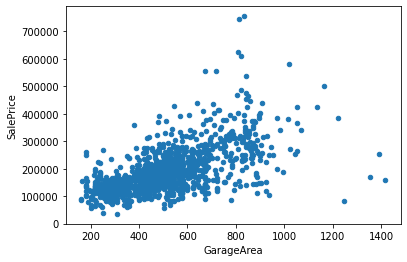

In [167]:
data = pd.concat([all_data[all_data['GarageArea']>0]['SalePrice'], all_data[all_data['GarageArea']>0]['GarageArea']], axis=1)
data.plot.scatter(x='GarageArea', y='SalePrice')


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1879'),
  Text(3, 0, '1880'),
  Text(4, 0, '1882'),
  Text(5, 0, '1885'),
  Text(6, 0, '1890'),
  Text(7, 0, '1892'),
  Text(8, 0, '1893'),
  Text(9, 0, '1895'),
  Text(10, 0, '1896'),
  Text(11, 0, '1898'),
  Text(12, 0, '1900'),
  Text(13, 0, '1901'),
  Text(14, 0, '1

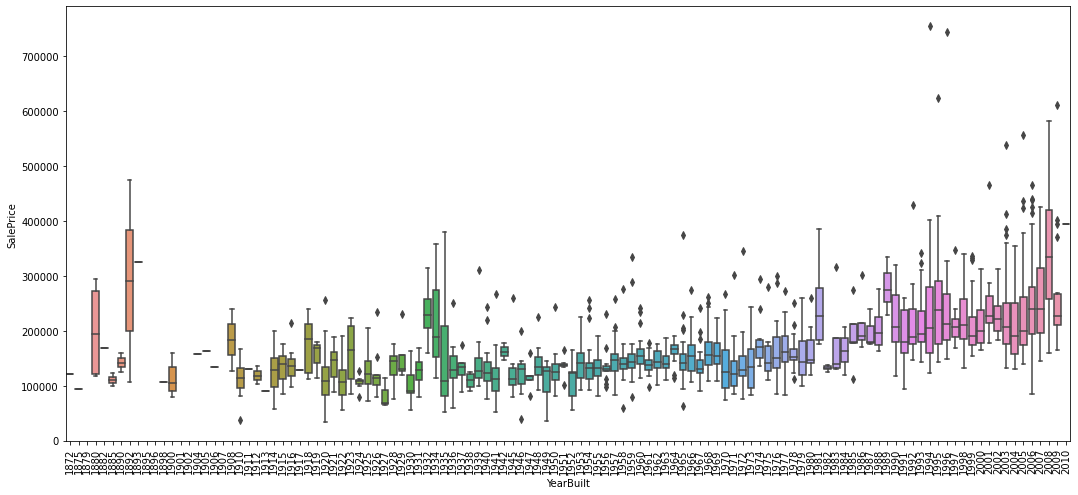

In [168]:
data = pd.concat([all_data['SalePrice'], all_data['YearBuilt']], axis=1)
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(data=data, x = 'YearBuilt', y = 'SalePrice')
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

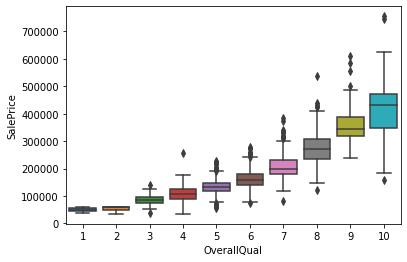

In [169]:
data = pd.concat([all_data['SalePrice'], all_data['OverallQual']], axis=1)
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

<AxesSubplot:>

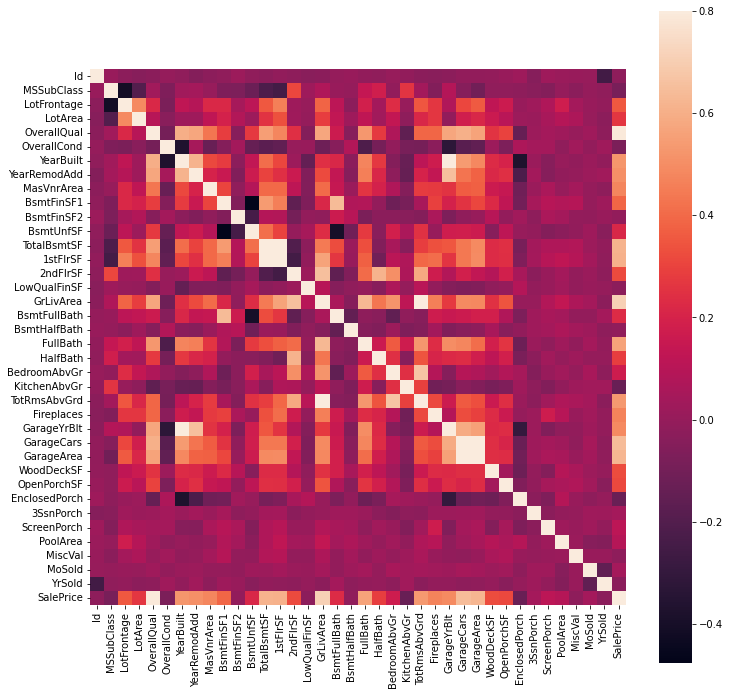

In [170]:
cor_map = all_data.corr()
fig2, ax2 = plt.subplots(figsize = (12,12))
sns.heatmap(cor_map, vmax=0.8, square = True)

In [171]:
# We want to limit our features to 10 to prevent OverFitting
cols = cor_map.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(all_data[cols].T)

In [172]:
# Then we look into each feature and get rid of our target variable and repetitive variables. In this case, since GarageCars is similar to GarageArea, we kept GarageArea. Also we get rid of 1stFlrSF, TotRmsAbvGrd and FullBath as we think they are not very crucial in determine the housing prices.

cols = ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','YearBuilt']

In [173]:
# Now we want to process the data

null_total = all_data[cols].isnull().sum().sort_values(ascending=False)
percent = (all_data[cols].isnull().sum()/all_data[cols].isnull().count()).sort_values(ascending=False)
missing = pd.concat([null_total,percent], axis=1, keys=['Total','Percentage'])
missing



,Total,Percentage
GarageArea,1,0.000343
TotalBsmtSF,1,0.000343
OverallQual,0,0.000000
GrLivArea,0,0.000000
YearBuilt,0,0.000000


In [174]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].mean())
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].mean())
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
2914          NaN
2915          NaN
2916          NaN
2917          NaN
2918          NaN
Name: SalePrice, Length: 2919, dtype: float64

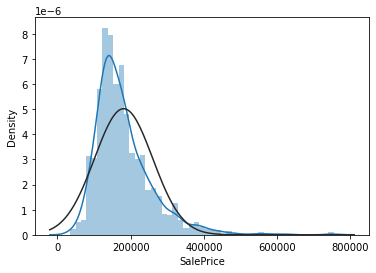

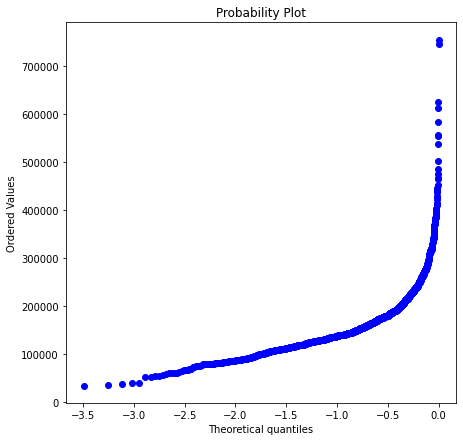

In [175]:
#Rescale Data for linear model

sns.distplot(all_data['SalePrice'], fit=norm)
fig3 = plt.figure(figsize=(7,7))
stats.probplot(all_data['SalePrice'], plot=plt)
all_data['SalePrice'] = np.log1p(all_data['SalePrice'])
all_data['SalePrice']

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([10.46027076, 10.47197813, 10.54273278, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

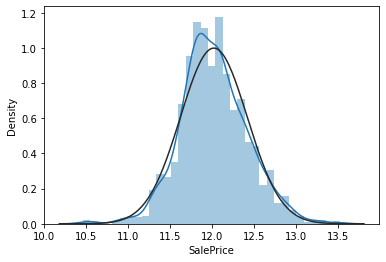

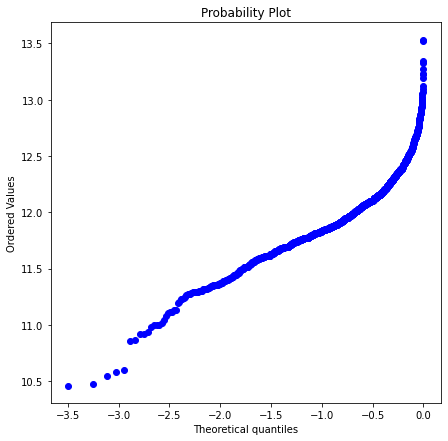

In [176]:
sns.distplot(all_data['SalePrice'], fit=norm)
fig4 = plt.figure(figsize=(7,7))
stats.probplot(all_data['SalePrice'], plot=plt)

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([ 334,  407,  438, ..., 4676, 5095, 5642], dtype=int64)),
 (489.2852312886761, 1500.7598492634463, 0.9659918130329507))

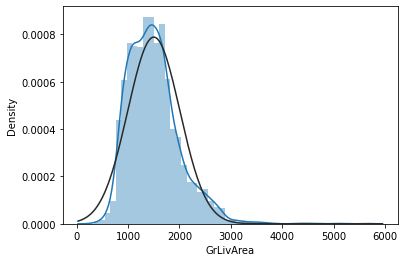

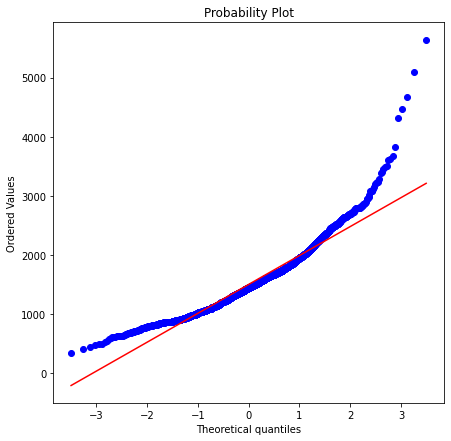

In [177]:
sns.distplot(all_data['GrLivArea'], fit=norm)
fig5 = plt.figure(figsize=(7,7))
stats.probplot(all_data['GrLivArea'], plot=plt)

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([5.81114099, 6.00881319, 6.08221891, ..., 8.45019832, 8.53601495,
         8.63799389])),
 (0.32473549770756693, 7.2607619158324725, 0.9983080589351974))

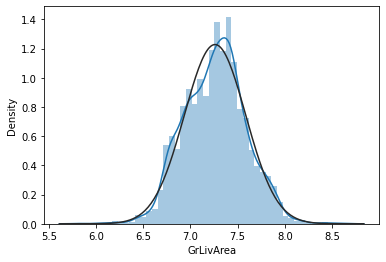

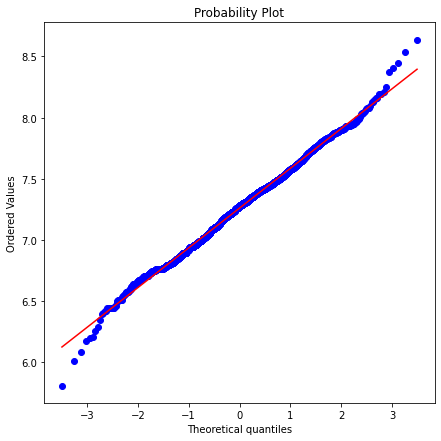

In [178]:
all_data['GrLivArea'] = np.log(all_data['GrLivArea'])
sns.distplot(all_data['GrLivArea'], fit=norm)
fig6 = plt.figure(figsize=(7,7))
stats.probplot(all_data['GrLivArea'], plot=plt)

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([   0.,    0.,    0., ..., 3206., 5095., 6110.])),
 (427.06227317491357, 1051.7775873886224, 0.9681952790406197))

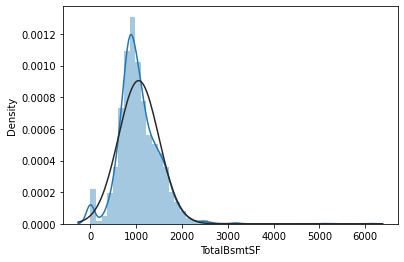

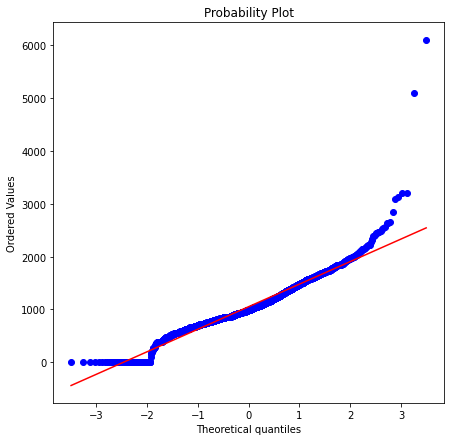

In [179]:
sns.distplot(all_data['TotalBsmtSF'], fit=norm)
fig7 = plt.figure(figsize=(7,7))
stats.probplot(all_data['TotalBsmtSF'], plot=plt)

In [180]:
all_data.loc[all_data['TotalBsmtSF']>0, 'TotalBsmtSF'] = np.log(all_data[all_data['TotalBsmtSF']>0]['TotalBsmtSF'])

((array([-3.48731273, -3.242637  , -3.10727964, ...,  3.10727964,
          3.242637  ,  3.48731273]),
  array([4.65396035, 5.07517382, 5.15329159, ..., 8.07277933, 8.53601495,
         8.71768205])),
 (0.37341078691441204, 6.917010434368383, 0.9911296642157867))

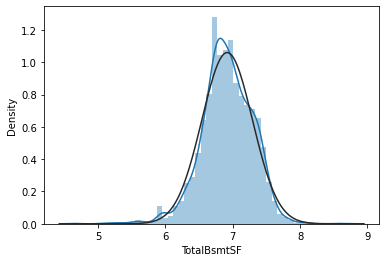

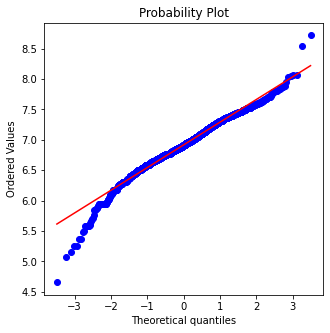

In [181]:
sns.distplot(all_data.loc[all_data['TotalBsmtSF']>0, 'TotalBsmtSF'], fit=norm)
fig8 = plt.figure(figsize=(5,5))
stats.probplot(all_data.loc[all_data['TotalBsmtSF']>0, 'TotalBsmtSF'], plot=plt)

In [182]:
# Splitting the data
train_x = all_data[:train_data_size][cols]
train_y = all_data[:train_data_size]['SalePrice']
test_x = all_data[train_data_size:][cols]


In [183]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



def root_mse(model):
    k_fold = KFold(n_splits = 5, random_state = 42, shuffle = True).split(train_x.values)
    error = np.sqrt(-cross_val_score(model, train_x.values, train_y, cv=k_fold, scoring = 'neg_mean_squared_error'))
    return error

In [184]:
LReg = make_pipeline(RobustScaler(), LinearRegression())
np.mean(root_mse(LReg))

0.1719624914840961

In [185]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
np.mean(root_mse(lasso))


0.17197066200500707

In [186]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, random_state = 1))
np.mean(root_mse(ENet))

0.17196588393575912

In [187]:
GBoosting = GradientBoostingRegressor(random_state = 5, max_depth = 5, n_estimators = 2000)
np.mean(root_mse(GBoosting))

0.1807525080188992

In [192]:
from math import e

submission = pd.DataFrame()
submission['Id'] = test_data['Id']
LReg.fit(train_x.values, train_y)
predict = LReg.predict(test_x)
submission['SalePrice'] = e**predict
submission.to_csv('Output/submission.csv',index=False)